# WRANGLE and ANALYZE Data


### About WE RATE DOGS :
We'll be wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs and includes a funny comment about the dog. The denominator of these ratings is almost always ten. But what about the denominators? It is almost always greater than ten. 11/10, 12/10, 13/10, etc. Why? Because "Brent has good dogs." WeRateDogs has over 4 million followers and has been featured in international media.


WeRateDogs downloaded and sent their Twitter archive to Udacity for use in this project. This archive includes basic tweet data (tweet ID, timestamp, text, and so on) for all 5000+ of their tweets as of August 1, 2017.

Main tasks in this project are as follows:

1. Data wrangling, which consists of:

 - Gathering data
 - Assessing data
 - Cleaning data


2. Storing, analyzing, and visualizing your wrangled data


3. Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [3]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install config

In [4]:
# Iniallizing : Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns


from numpy import median
import requests
import tweepy
import os
import json
import sys


from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from datetime import datetime
from config import Config
import re

# 1. Gathering Data

In [5]:
# Collecting Data from the Twitter Archive
archive = pd.read_csv('/home/workspace/twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#Retreiving the image predictions from Udacity server
retrieve = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [7]:
# Saving the obtained data 
with open('/home/workspace/image-predictions.tsv', 'wb') as file:
    file.write(retrieve.content)

In [8]:
# create dataframe
df_img_init = pd.read_csv('/home/workspace/image-predictions.tsv', sep='\t')
df_img_init.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
# configure twitter API
#auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
#auth.set_access_token(config.access_token, config.access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# complete information using twitter API
#with open('data/tweet_json.txt','w') as outfile:
    # call infos
    #for i in archive['tweet_id']:
        # handling exception
        #try:
            #tweet = api.get_status(i,tweet_mode='extended')
            #json.dump(tweet._json, outfile)
            #outfile.write("\n")
        #except:
            #e = os.sys.exc_info()[0]
            
# inspiration from try/except : https://wiki.python.org/moin/HandlingExceptions

In [11]:
# Defining the elements to be retained 
retain_elements = ['id', 'favorite_count', 'retweet_count']

# Defining the required Dictionary
data = []
with open('/home/workspace/tweet_json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in retain_elements)
        data.append(data_row)
        json_tweet = r.readline()
        
            
# create DataFrame    
df_gat_data = pd.DataFrame.from_dict(data)

# confirm
df_gat_data.head()

,favorite_count,id,retweet_count
0,39007,892420643555336193,8658
1,33395,892177421306343426,6358
2,25181,891815181378084864,4223
3,42360,891689557279858688,8769
4,40520,891327558926688256,9536


# 2. Assessing the Data

### 2.1 Assessing the archive


In [12]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Observations : 

- The rows need to be suppressed if the value is a non-null to conserve only original tweets for the coulumn data corresponding to  : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_statud_timestamp
- The source contains html residues
- The variables doggo, floofer, pupper and puppo present in the data as depicted above, all represent one single variable and as per the tidyness rule, should be a part of a single column

In [13]:
# Getting the information regarding the data for further investigation
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Observations :

- The "timestamp" is present as an object, which is supposed to be converted into datetime to be exploitable.
- We can observe that there are some 'None' objects present in "doggo", "floofer", "pupper" and "puppo" which have to be convert into 'NaN'.
- Some entries are missing expanded URL's.
- The "tweet_id" currently present as an 'INT' should be converted to 'string' datatype.

In [14]:
# Checking for Duplicate values corresponding to IDs.

archive['tweet_id'].duplicated().sum()

0

In [15]:
# Defining Stop Words function

def stop_words(data_frame_column,name):
    '''
    take a data frame column and a column name
    and print the number of stop words in the column
    '''
    count=0
    for word in data_frame_column:
        if word in ENGLISH_STOP_WORDS:
            count+=1
    print('The column ',name,' has ',count,' stop words.')

In [16]:
# Here we check the count of stop-words for each of the columns

stop_words(archive['tweet_id'],'tweet_id')
stop_words(archive['timestamp'],'timestamp')
stop_words(archive['source'],'source')
stop_words(archive['expanded_urls'],'expanded_urls')
stop_words(archive['rating_numerator'],'rating_numerator')
stop_words(archive['rating_denominator'],'rating_denominator')
stop_words(archive['name'],'name')
stop_words(archive['doggo'],'doggo')
stop_words(archive['floofer'],'floofer')
stop_words(archive['pupper'],'pupper')
stop_words(archive['puppo'],'puppo')

The column  tweet_id  has  0  stop words.
The column  timestamp  has  0  stop words.
The column  source  has  0  stop words.
The column  expanded_urls  has  0  stop words.
The column  rating_numerator  has  0  stop words.
The column  rating_denominator  has  0  stop words.
The column  name  has  87  stop words.
The column  doggo  has  0  stop words.
The column  floofer  has  0  stop words.
The column  pupper  has  0  stop words.
The column  puppo  has  0  stop words.


### Observations : 

- The "name" column has multiple stop words present.

In [17]:
# Defining a function to detect the presence of 'None' string

def detect_none(data_frame_column,name):
    '''
    take a data frame column and a column name
    and print the number of 'None' string in the column
    '''
    count=0
    for word in data_frame_column:
        if word == 'None':
            count+=1
    print('The Column ', name, ' has ',count,'None entries present.')

In [18]:
# Calling the detect_none function defined above

detect_none(archive['tweet_id'],'tweet_id')
detect_none(archive['timestamp'],'timestamp')
detect_none(archive['source'],'source')
detect_none(archive['expanded_urls'],'expanded_urls')
detect_none(archive['rating_numerator'],'rating_numerator')
detect_none(archive['rating_denominator'],'rating_denominator')
detect_none(archive['name'],'name')
detect_none(archive['doggo'],'doggo')
detect_none(archive['floofer'],'floofer')
detect_none(archive['pupper'],'pupper')
detect_none(archive['puppo'],'puppo')

The Column  tweet_id  has  0 None entries present.
The Column  timestamp  has  0 None entries present.
The Column  source  has  0 None entries present.
The Column  expanded_urls  has  0 None entries present.
The Column  rating_numerator  has  0 None entries present.
The Column  rating_denominator  has  0 None entries present.
The Column  name  has  745 None entries present.
The Column  doggo  has  2259 None entries present.
The Column  floofer  has  2346 None entries present.
The Column  pupper  has  2099 None entries present.
The Column  puppo  has  2326 None entries present.


### Observations : 

- As evident from above, the "name" column has a total of 745 'None' strings present.
- Also, the columns "doggo", "floofer", "pupper" and "puppo" have 'None' strings present too.

In [19]:
# During the observation of the Data Frame, we notice a Double-Link in "expanded_urls" column data content

# Sample of double urls
print('Sample of double URLs : ',archive.expanded_urls[6])

# Summing up for retrieving the total count of double urls 
double_urls = archive.expanded_urls.str.contains(r',').sum()

# Output the total count of double links
print('Number of double links: ',double_urls)

Sample of double URLs :  https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
Number of double links:  639


### Observation : 
- We can clearly visualize from above that a total of 639 double links are present within "expanded_urls" column data

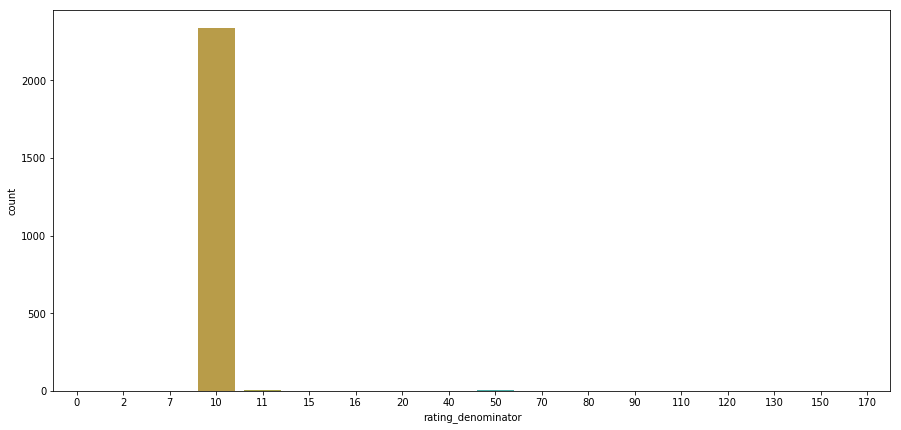

In [20]:
# Finding the denominator through graphs/plots 

plt.figure(figsize=(15,7))
sns.countplot(archive.rating_denominator)

In [21]:
# Finding the count of Denominators not equal to the normal value of '10' 
count_not_dec = 0
for i in archive['rating_denominator']:
    if i != 10 :
        count_not_dec += 1
        
print('The count of entries not equal to 10 is {}.'.format(count_not_dec))

The count of entries not equal to 10 is 23.


### Observations : 

- We can see that a total of 23 ratings do not have the denominator value as 10, i.e. these many values are not rated out of 10.

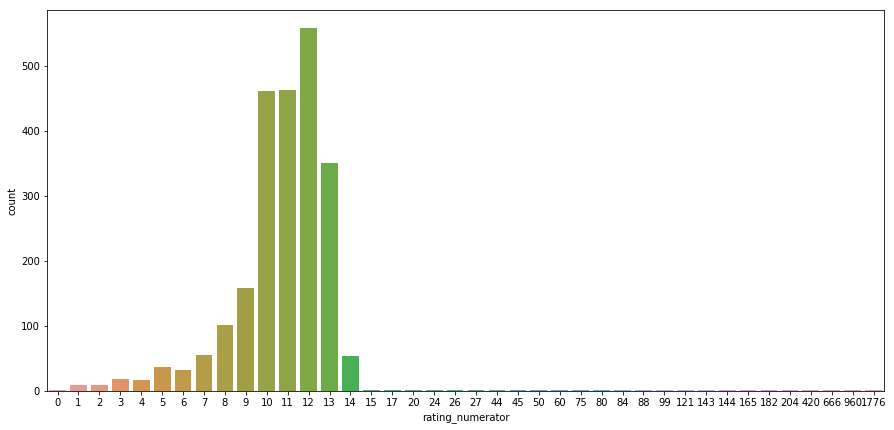

In [22]:
# Visualizing the values for Numerators in the given ratings

plt.figure(figsize=(15,7))
sns.countplot(archive.rating_numerator)

In [23]:
# Calculating the number of values for which the Numerator is under 10 

count_num_lessthan_10 = 0
for num in archive['rating_numerator']:
    if num <= 9:
        count_num_lessthan_10 += 1
        
# Output the Count         
print('The count of Numerator values less than 10 is {}.'.format(count_num_lessthan_10))

The count of Numerator values less than 10 is 440.


### Observations : 

- Thus, we can see that a total of 440 entries have a Numerator value less than 10.

In [24]:
# A sample possessing scrapping error while parsing the Numerator

print(archive.text[695],'\n','The Numerator value extracted is : ',archive.rating_numerator[695])

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
 The Numerator value extracted is :  75


In [25]:
# The scrapping error seems to be more prone to Numerators containing Decimal Values

# So, we try to look for entries where the Numerator is a Decimal Value, using Regular Expressions 

test = archive.copy()

for row in test['text']:
    detect = '(\d+\.\d+)\/(\d+)'
    detect_result = re.search(detect,row)
    if detect_result != None:
        Index=test.loc[test['text']==row].index[0]
        Text = archive.text[Index]
        Numerator = archive.rating_numerator[Index]
        print('Index: ',Index,'\n',
              'Text: ',Text,'\n'
              'Numerator: ',Numerator,'\n',
             )
        


Index:  45 
 Text:  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
Numerator:  5 

Index:  340 
 Text:  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 
Numerator:  75 

Index:  695 
 Text:  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
Numerator:  75 

Index:  763 
 Text:  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
Numerator:  27 

Index:  1689 
 Text:  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
Numerator:  5 

Index:  1712 
 Text:  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 
N

### Observations :

- It is pretty evident from the above result that we are getting incorrect or false data corresponding to the Numerators, when it has a Decimal Value, for all numerators in "rating_numerator" column.

0    1976
1     366
2      14
Name: gender_number, dtype: int64

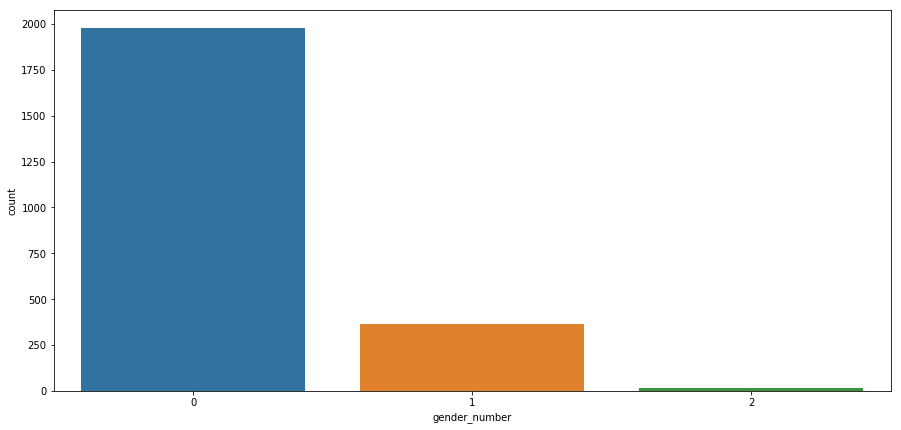

In [26]:
# Another assessment we come across is that there is a contradiction in dog categories.
# Here, we have multiple categories for dogs, namely "doggo","floofer","pupper","puppo".
# Ideally, we should have dog in a single category, and not in multiple ones as mentioned above.

# So, in order to maintain a single category, we start by transforming the category in 0 or 1
# Hence, we temporarily create a new category with sum if superior to 1 is false 

# Creating a copy 
archive_2 = archive.copy()

# Defining a procedure to convert the column into a bi-variate 0 and 1 
archive_2['doggo'] = archive_2['doggo'].apply(lambda x: 0 if x=='None' else 1)
archive_2['floofer'] = archive_2['floofer'].apply(lambda x: 0 if x=='None' else 1)
archive_2['pupper'] = archive_2['pupper'].apply(lambda x: 0 if x=='None' else 1)
archive_2['puppo'] = archive_2['puppo'].apply(lambda x: 0 if x=='None' else 1)

# Defining a new column "gender_number"
archive_2['gender_number']=archive_2.iloc[:,[13,14,15,16]].sum(axis=1)

# Measuring the number 
plt.figure(figsize=(15,7))
sns.countplot(archive_2.gender_number)

# Displaying the total count against each value
archive_2['gender_number'].value_counts()

### Observations :

- Hence, we can visualize that there are 14 rows, belonging in two categories.

#### Assessment Summary : 

- The values corresponding to "tweet_id" column, currently present as 'INT' values, have to be of 'string' data types.
- The rows need to be suppressed if the value is a non-null to conserve only original tweets for the coulumn data corresponding to  : "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_statud_timestamp".
- The source contains html residues.
- Some entries are missing expanded URL's.
- The variables doggo, floofer, pupper and puppo present in the data as depicted above, all represent one single variable and as per the tidyness rule, should be a part of a single column.
- We can observe that there are some 'None' objects present in "doggo", "floofer", "pupper" and "puppo" which have to be convert into 'NaN'.
- 14 rows are in two categories
- 'None' object in "doggo", "floofer", "pupper" and "puppo" have to be converted into 'NaN'.
- The "timestamp" is present as an object, which is supposed to be converted into datetime to be exploitable.
- The "name" column has multiple stop words present.
- As evident from above, the "name" column has a total of 745 'None' strings present.
- We can clearly visualize from above that a total of 639 double links are present within "expanded_urls" column data.
- We can see that a total of 23 ratings do not have the denominator value as 10, i.e. these many values are not rated out of 10.
- Thus, we can see that a total of 440 entries have a Numerator value less than 10.
- It is pretty evident from the above result that we are getting incorrect or false data corresponding to the Numerators, when it has a Decimal Value, for all numerators in "rating_numerator" column.

### 2.2 Assessing image


In [27]:
# Viewing the data structure.
df_img_init.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Observations : 

- We can observe that the columns "p1", "p2" and "p3" possess inconsistent writings.

In [28]:
# Getting insights on the data.
df_img_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
# Getting the count of Duplicates 
df_img_init.duplicated().sum()

0

In [30]:
# Checking for present images

img_count = 0
for img in df_img_init['img_num']:
    if img < 1:
        img_count += 1
print('The row {} has 0 image'.format(img_count))

The row 0 has 0 image


In [31]:
# Getting the count of image

df_img_init['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
# Finding the count for Stop-Words present in each columns

stop_words(df_img_init['tweet_id'],'tweet_id')
stop_words(df_img_init['jpg_url'],'jpg_url')
stop_words(df_img_init['img_num'],'img_num')
stop_words(df_img_init['p1'],'p1')
stop_words(df_img_init['p1_conf'],'p1_conf')
stop_words(df_img_init['p2'],'p2')
stop_words(df_img_init['p2_conf'],'p2_conf')
stop_words(df_img_init['p3'],'p3')
stop_words(df_img_init['p3_conf'],'p3_conf')
stop_words(df_img_init['p1_dog'],'p1_dog')
stop_words(df_img_init['p2_dog'],'p2_dog')
stop_words(df_img_init['p3_dog'],'p3_dog')

The column  tweet_id  has  0  stop words.
The column  jpg_url  has  0  stop words.
The column  img_num  has  0  stop words.
The column  p1  has  0  stop words.
The column  p1_conf  has  0  stop words.
The column  p2  has  0  stop words.
The column  p2_conf  has  0  stop words.
The column  p3  has  0  stop words.
The column  p3_conf  has  0  stop words.
The column  p1_dog  has  0  stop words.
The column  p2_dog  has  0  stop words.
The column  p3_dog  has  0  stop words.


In [33]:
# Calculating the count of 'None' string

detect_none(archive['tweet_id'],'tweet_id')
detect_none(archive['timestamp'],'timestamp')
detect_none(archive['source'],'source')
detect_none(archive['expanded_urls'],'expanded_urls')
detect_none(archive['rating_numerator'],'rating_numerator')
detect_none(archive['rating_denominator'],'rating_denominator')
detect_none(archive['name'],'name')
detect_none(archive['doggo'],'doggo')
detect_none(archive['floofer'],'floofer')
detect_none(archive['pupper'],'pupper')
detect_none(archive['puppo'],'puppo')

The Column  tweet_id  has  0 None entries present.
The Column  timestamp  has  0 None entries present.
The Column  source  has  0 None entries present.
The Column  expanded_urls  has  0 None entries present.
The Column  rating_numerator  has  0 None entries present.
The Column  rating_denominator  has  0 None entries present.
The Column  name  has  745 None entries present.
The Column  doggo  has  2259 None entries present.
The Column  floofer  has  2346 None entries present.
The Column  pupper  has  2099 None entries present.
The Column  puppo  has  2326 None entries present.


True     1532
False     543
Name: p1_dog, dtype: int64

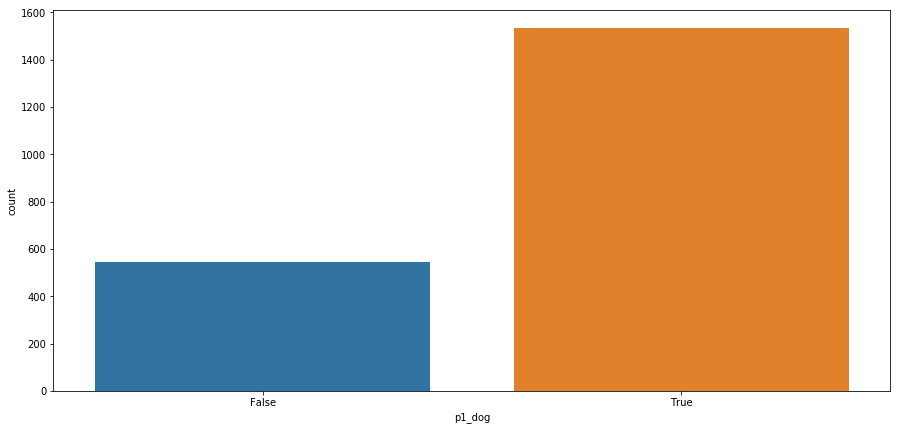

In [34]:
# Checking for dog1

plt.figure(figsize=(15,7))
sns.countplot(df_img_init.p1_dog)

df_img_init['p1_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

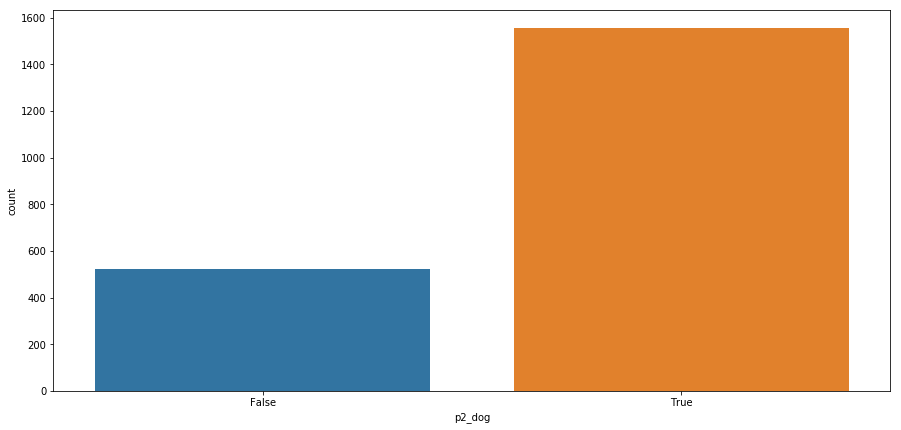

In [35]:
# Checking for dog2
plt.figure(figsize=(15,7))
sns.countplot(df_img_init.p2_dog)

df_img_init['p2_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

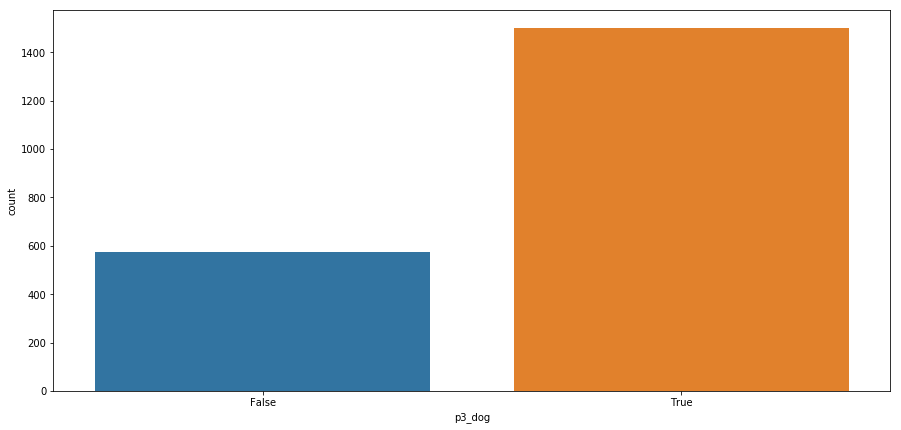

In [36]:
# Checking for dog3
plt.figure(figsize=(15,7))
sns.countplot(df_img_init.p3_dog)

df_img_init['p3_dog'].value_counts()

0    1243
1     347
3     324
2     161
Name: no_dog, dtype: int64

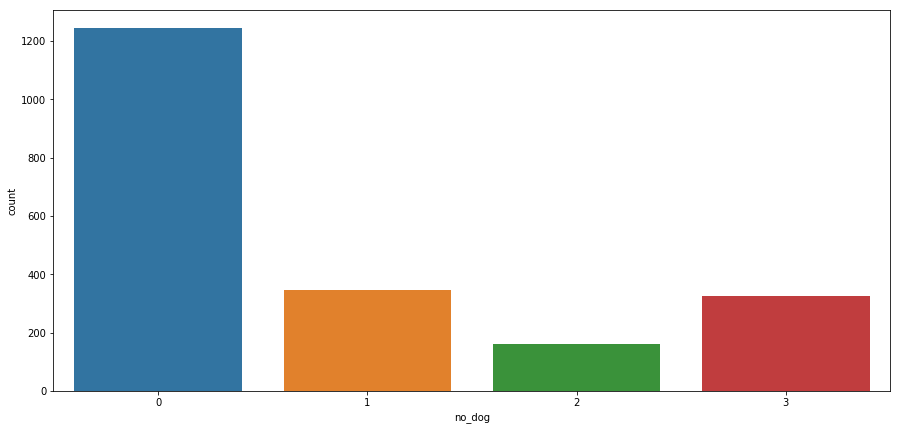

In [37]:
# Defining a check to verify if it's a dog

# We start off by transforming category in 0 or 1
# We make the use of a temporarily created new category 

# Generating a copy 
df_img_2 = df_img_init.copy()

# Defining a procedure to convert the column into a bi-variate 0 and 1
df_img_2['p1_dog'] = df_img_2['p1_dog'].apply(lambda x: 0 if x==True else 1)
df_img_2['p2_dog'] = df_img_2['p2_dog'].apply(lambda x: 0 if x==True else 1)
df_img_2['p3_dog'] = df_img_2['p3_dog'].apply(lambda x: 0 if x==True else 1)

# Creating a new column 
df_img_2['no_dog'] = df_img_2.iloc[:,[5,8,11]].sum(axis=1)

# Measuring the number 
plt.figure(figsize=(15,7))
sns.countplot(df_img_2.no_dog)

# Getting the Count 
df_img_2['no_dog'].value_counts()

### Observations : 

- As seen above, for a total of 324 rows in the Data, no dogs are recognized.

#### Assessment  Summary

- We can observe that the columns "p1", "p2" and "p3" possess inconsistent writings.
- As seen above, for a total of 324 rows in the Data, no dogs are recognized.

### 2.3 Assessing info

In [38]:
# Viewing the data structure.
df_gat_data.head()

,favorite_count,id,retweet_count
0,39007,892420643555336193,8658
1,33395,892177421306343426,6358
2,25181,891815181378084864,4223
3,42360,891689557279858688,8769
4,40520,891327558926688256,9536


In [39]:
# Getting insights on the data.
df_gat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
id                2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [40]:
# Finding the count of Duplicated entries.
df_gat_data.duplicated().sum()

0

### 2.4 Assessing conclusion


> ####  Archive
    - The values corresponding to "tweet_id" column, currently present as 'INT' values, have to be of 'string' data types.
    - The rows need to be suppressed if the value is a non-null to conserve only original tweets for the coulumn data corresponding to  : "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_statud_timestamp".
    - The source contains html residues.
    - Some entries are missing expanded URL's.
    - The variables doggo, floofer, pupper and puppo present in the data as depicted above, all represent one single variable and as per the tidyness rule, should be a part of a single column.
    - We can observe that there are some 'None' objects present in "doggo", "floofer", "pupper" and "puppo" which have to be convert into 'NaN'.
    - 14 rows are in two categories
    - 'None' object in "doggo", "floofer", "pupper" and "puppo" have to be converted into 'NaN'.
    - The "timestamp" is present as an object, which is supposed to be converted into datetime to be exploitable.
    - The "name" column has multiple stop words present.
    - As evident from above, the "name" column has a total of 745 'None' strings present.
    - We can clearly visualize from above that a total of 639 double links are present within "expanded_urls" column data.
    - We can see that a total of 23 ratings do not have the denominator value as 10, i.e. these many values are not rated out of 10.
    - Thus, we can see that a total of 440 entries have a Numerator value less than 10.
    - It is pretty evident from the above result that we are getting incorrect or false data corresponding to the Numerators, when it has a Decimal Value, for all numerators in "rating_numerator" column.


> #### Image
    - The values corresponding to "tweet_id" column, currently present as 'INT' values, have to be of 'string' data types.
    - We can observe that the columns "p1", "p2" and "p3" possess inconsistent writings.
    - As seen above, for a total of 324 rows in the Data, no dogs are recognized.

> #### Info
    - The 'id' has to be of 'string' data-type.

> #### Global
    - The len of each document should be same.
    - We need to have one dataframe.

# 3. Cleaning Data
<a id='cleaning_data'></a>

In [41]:
# Creating copies of the Dataframes for Cleaning

clean_archive=archive.copy()
clean_image=df_img_init.copy()
clean_info=df_gat_data.copy()

### 3.1 Cleaning Archive


#### Resolving the Double-Links error and generating URLs when missing 

In [42]:
# Cleaning the URLs: 

for i in range(len(clean_archive)):
    twt_id=clean_archive['tweet_id'][i]
    url = 'https://twitter.com/dog_rates/status/{}'.format(twt_id)
    clean_archive['expanded_urls'].replace(clean_archive['expanded_urls'][i],url,inplace=True)


In [43]:
# Verifying the changes made in the previous cell

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Suppressing the rows with re-tweet and unnecessary columns

In [44]:
# Dropping the unnecessary rows

clean_archive = clean_archive[clean_archive['in_reply_to_status_id'].isnull()]
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

In [45]:
# Dropping the unnecessary columns

clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

In [46]:
# Verifying the changes made above 

print(len(archive)-len(clean_archive))
clean_archive.head(0)

259


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Cleaning the  HTML residues present in the Source

In [47]:
# Defing the procedure

clean_archive['source'] = clean_archive['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))


In [48]:
# Verifying whether the changes have been impacted successfully

clean_archive['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

#### Changing the Data-type of ''timestamp'' to 'datetime'

In [49]:
# Making the changes

clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

In [50]:
# Verifying the changes 

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


#### Changing the Data-type of "tweet_id" from 'INT' to 'string' 

In [51]:
# Making the change in data-type

clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)

In [52]:
# Verifying the changes made

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Suppressing the 'Stop-Words' in "name" column

In [53]:
# From manual observation, it is apparent that the Stop Words replace Name 
# Hence we suppress stop words as :  
for shabd in clean_archive['name']:
    if shabd in ENGLISH_STOP_WORDS:
        clean_archive['name']=clean_archive['name'].where(clean_archive['name']!=shabd, np.NaN)

In [54]:
# Verifying the changes made

stop_words(clean_archive['name'],'name')

The column  name  has  0  stop words.


#### Converting the "name" column into lower case

In [55]:
# Converting into lower case
clean_archive['name'] = clean_archive['name'].str.lower()

# Verifying the changes
clean_archive['name']

0        phineas
1          tilly
2         archie
3          darla
4       franklin
5           none
6            jax
7           none
8           zoey
9         cassie
10          koda
11         bruno
12          none
13           ted
14        stuart
15        oliver
16           jim
17          zeke
18       ralphus
20        gerald
21       jeffrey
22           NaN
23        canela
24          none
25          none
26          maya
27        mingus
28         derek
29        roscoe
31       waffles
          ...   
2326       quite
2327         NaN
2328        none
2329        none
2330        none
2331        none
2332        none
2333         NaN
2334         NaN
2335         NaN
2336        none
2337        none
2338        none
2339        none
2340        none
2341        none
2342        none
2343        none
2344        none
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351        none
2352         NaN
2353         N

#### Replacing 'None' string with 'NaN'

In [56]:
# Making the required changes

clean_archive['name'] = clean_archive['name'].where(clean_archive['name'] != shabd, np.NaN) 
clean_archive['doggo'] = clean_archive['doggo'].where(clean_archive['doggo'] != shabd, np.NaN) 
clean_archive['floofer'] = clean_archive['floofer'].where(clean_archive['floofer'] != shabd, np.NaN) 
clean_archive['pupper'] = clean_archive['pupper'].where(clean_archive['pupper'] != shabd, np.NaN) 
clean_archive['puppo'] = clean_archive['puppo'].where(clean_archive['puppo'] != shabd, np.NaN) 

In [57]:
# Verifying the changes made

detect_none(clean_archive['name'],'name')
detect_none(clean_archive['doggo'],'doggo')
detect_none(clean_archive['floofer'],'floofer')
detect_none(clean_archive['pupper'],'pupper')
detect_none(clean_archive['puppo'],'puppo')

The Column  name  has  0 None entries present.
The Column  doggo  has  0 None entries present.
The Column  floofer  has  0 None entries present.
The Column  pupper  has  0 None entries present.
The Column  puppo  has  0 None entries present.


#### Monitoring the Numerator and Denominator Values

In [58]:
# Observing the Numerators with value under ten

print('Ex 1: ',clean_archive['text'][1068])
print('Ex 2: ',clean_archive['text'][1165])
print('Ex 3: ',clean_archive['text'][2335])

Ex 1:  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Ex 2:  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Ex 3:  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


Here, we observe two different cases wherein the ratings are not following the standards. 

In Case 1, it is done so delibarately and is not an extraction problem, so we would be keeping it.
Whereas in Case 2, while performing the extraction, it chooses only the first fraction in the message, hence we should correct it.

In [59]:
# Defining a new dataframe filtered with the items to analyze 
to_analyze = clean_archive.loc[clean_archive['rating_denominator']!=10]

# Looking up the suspected data 
for i in to_analyze['text']:
    if '/10' in i:
        print(i)
        print(to_analyze[to_analyze['text']==i].index)

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Int64Index([1068], dtype='int64')
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Int64Index([1165], dtype='int64')
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Int64Index([1202], dtype='int64')
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Int64Index([1662], dtype='int64')
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Int64Index([2335], dtype='int64')


In [60]:
# Manual replacement of data 
clean_archive.loc[clean_archive.index == 1068, 'rating_numerator'] = 14
clean_archive.loc[clean_archive.index == 1165, 'rating_numerator'] = 13
clean_archive.loc[clean_archive.index == 1202, 'rating_numerator'] = 11
clean_archive.loc[clean_archive.index == 1662, 'rating_numerator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_numerator'] = 9

clean_archive.loc[clean_archive.index == 1068, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1165, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1202, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1662, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_denominator'] = 10

#### Fixing the Numerators containing Decimal Values

In [61]:
# Locating the entries with Numerator containing Decimal Values

for row in test['text']:
    detect = '(\d+\.\d+)\/(\d+)'
    srch = re.search(detect,row)
    if srch != None:
        Ind=test.loc[test['text']==row].index[0]
        Txt = archive.text[Ind]
        Num = archive.rating_numerator[Ind]
        print('Index is : ',Ind,'\n',
              'Text is : ',Txt,'\n'
              'The Numerator is : ',Num,'\n',
             )
        

Index is :  45 
 Text is :  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
The Numerator is :  5 

Index is :  340 
 Text is :  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 
The Numerator is :  75 

Index is :  695 
 Text is :  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
The Numerator is :  75 

Index is :  763 
 Text is :  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
The Numerator is :  27 

Index is :  1689 
 Text is :  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
The Numerator is :  5 

Index is :  1712 
 Text is :  Here we have uncovere

In [62]:
# Manual replacement of Data 

clean_archive.loc[clean_archive.index == 45, 'rating_numerator'] = 13.5
clean_archive.loc[clean_archive.index == 340, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 695, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 763, 'rating_numerator'] = 11.27
clean_archive.loc[clean_archive.index == 1689, 'rating_numerator'] = 9.5
clean_archive.loc[clean_archive.index == 1712, 'rating_numerator'] = 11.26

In [63]:
# Verifying the changes made

clean_archive.loc[45]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
source                "http://twitter.com/download/iphone" rel="nofo...
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              bella
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
Name: 45, dtype: object

#### Dogs stage

##### Creating a column

In [64]:
# Defining a function aimed at creating a column with all stage

def Dog_Stage(row):
    # Defining a list to store the data
    stg_lst = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        stg_lst.append('doggo')
    if row['floofer'] == 'floofer':
        stg_lst.append('floofer')
    if row['pupper'] == 'pupper':
        stg_lst.append('pupper')
    if row['puppo'] == 'puppo':
        stg_lst.append('puppo')
    if len(stg_lst) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stg_lst)
    return row


In [65]:
# Applying the "dog-stage" function to each record
clean_archive = clean_archive.apply(Dog_Stage, axis=1)

In [66]:
# Discarding unwanted entries
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [67]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,phineas,None
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,tilly,None
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,archie,None
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,darla,None
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,franklin,None


##### Inspecting the text when dog has two stages

In [68]:
for ind, rw in clean_archive.iterrows():
    if ' and ' in rw['stage']:
        print (ind,rw['stage'],'\n','\n',
               rw['text'],'\n','\n')

191 doggo and puppo 
 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 
 

200 doggo and floofer 
 
 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 
 

460 doggo and pupper 
 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 
 

531 doggo and pupper 
 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 
 

575 doggo and pupper 
 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj 
 

705 doggo and pupper 
 
 This is Pinot. He's a sophisticated doggo. You can 

191 doggo,puppo correction puppo

200 doggo,floofer correction floofer

460 doggo,pupper correction pupper

*** 531 doggo,pupper correct ***

575 doggo,pupper correction doggo

705 doggo,pupper correction doggo

*** 733 doggo,pupper correct ***

*** 889 doggo,pupper correct ***

956 doggo,pupper correction NaN

*** 1063 doggo,pupper correct ***

*** 1113 doggo,pupper correct ***


In [69]:
# Implementing the corrections manually

clean_archive.loc[clean_archive.index == 191, 'stage'] = 'puppo'
clean_archive.loc[clean_archive.index == 200, 'stage'] = 'floofer'
clean_archive.loc[clean_archive.index == 460, 'stage'] = 'pupper'
clean_archive.loc[clean_archive.index == 575, 'stage'] = 'doggo'
clean_archive.loc[clean_archive.index == 705, 'stage'] = 'doggo'
clean_archive.loc[clean_archive.index == 956, 'stage'] = np.NaN

In [70]:
# transform None in NaN
clean_archive['stage'] = clean_archive['stage'].where(clean_archive['stage']!=shabd, np.NaN) 

In [71]:
# Verifying the changes
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2012 non-null object
stage                 335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 243.8+ KB


### 3.2 Cleaning Image

#### Changing the Data-type of "tweet_id" to string

In [72]:
# Making the Changes
clean_image['tweet_id']=clean_image['tweet_id'].astype(str)

In [73]:
# Verifying the changes
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Fixing the Inconsistent cases

In [74]:
# Making the changes

clean_image['p1'] = clean_image['p1'].str.lower()
clean_image['p2'] = clean_image['p2'].str.lower()
clean_image['p3'] = clean_image['p3'].str.lower()

In [75]:
# Verifying the changes

clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


##### Verifying whether Dog or not

In [76]:
# Generating a new columns

clean_image['dog']=df_img_2['no_dog'].apply(lambda x: False if x==3 else True )

In [77]:
# Verifying the changes

print(clean_image['dog'].head(),clean_image['dog'][17])

0    True
1    True
2    True
3    True
4    True
Name: dog, dtype: bool False


### 3.3 Cleaning Info


In [78]:
# Modifying the data type of id to string 
clean_info['id'] = clean_info['id'].astype(str)

# Verifying the Changes
clean_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
id                2345 non-null object
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


### 3.4 Merging up the Cleaned Data


##### Merge and suppress row without image

In [79]:
# Performing inner joins on 'id' to merge the data

df_final = clean_image.merge(clean_archive, left_on='tweet_id',right_on='tweet_id',how='inner')
df_final = df_final.merge(clean_info,left_on='tweet_id',right_on='id',how='inner')

# Dropping unnecessary fields
df_final = df_final.drop(['id'], axis=1)

In [110]:
# Verifying the Changes
df_final.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'favorite_count',
       'retweet_count'],
      dtype='object')

##### Store data

In [111]:
# store data 
df_final.to_csv('/home/workspace/twitter_archive_master.csv',index=False)

# 4. Investigating Data


In [112]:

df = df_final.copy()

### 4.1 Inspecting the Global information on sharing


In [113]:
# Getting the Description of retweet variable
df['retweet_count'].describe()

count     1971.000000
mean      2756.426687
std       4749.089405
min         13.000000
25%        614.500000
50%       1336.000000
75%       3163.500000
max      77886.000000
Name: retweet_count, dtype: float64

In [114]:
# Looking up the record with the miminum retweet 
for ind, rw in df.iterrows():
    if rw['retweet_count']==13:
        print ('index: ',ind,'\n','\n',
               rw,'\n','\n',
              )

index:  16 
 
 tweet_id                                             666102155909144576
jpg_url                 https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
img_num                                                               1
p1                                                       english_setter
p1_conf                                                        0.298617
p1_dog                                                             True
p2                                                         newfoundland
p2_conf                                                        0.149842
p2_dog                                                             True
p3                                                               borzoi
p3_conf                                                        0.133649
p3_dog                                                             True
dog                                                                True
timestamp                                        

# Image of the tweet
![Pictures of the tweet](https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg)

In [115]:
# Looking up the row with the maximum retweet 
for ind, rw in df.iterrows():
    if rw['retweet_count']==77996:
        print ('index: ',ind,'\n','\n',
               rw,'\n','\n',
              )

# Image of the tweet
![Pictures of the tweet](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

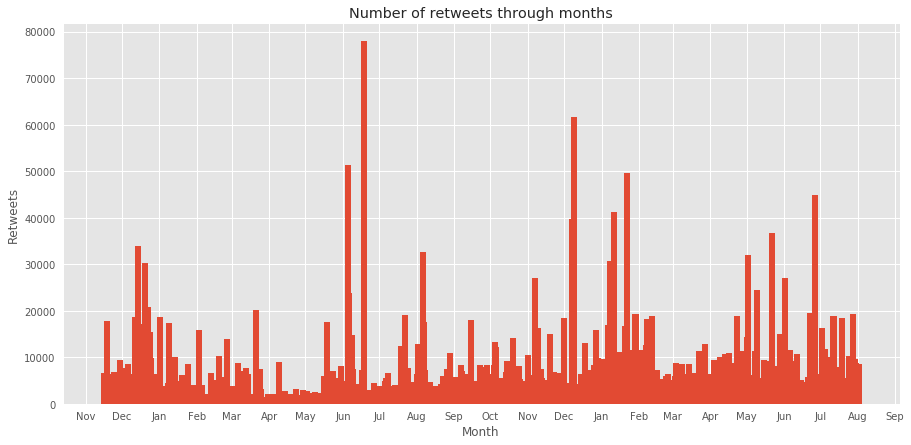

In [116]:
# Getting the evolution of tweet sharing 
df_plot=df.copy()

# Setting up the date as index
df_plot.set_index('timestamp',inplace=True)

# Setting up the plot style to 'ggplot'
plt.style.use('ggplot')

# Plotting the data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_plot.index, df_plot['retweet_count'],width=5)


# Setting up the ticks for each week
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Setting the format for major ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Setting up the axis and graph titles
ax.set_title('Number of retweets through months')
ax.set_xlabel('Month')
ax.set_ylabel('Retweets')

# Generating the figure
fig.savefig('/home/workspace/retweets_through_time.png')

● Post the removal of Outliers, we perform the specific analysis.
we can see that in June and December it had the most occuring tweets.

### 4.2 Visualizing the Variables


##### Skimming away the Outliers

In [87]:
# Defining the function to remove the outliers

def discard_outliers(dataframe, column):
    '''
    the function take a dataframe and a column as argument 
    cut the outlier of the dataframe
    and return the new dataframe shape
    '''
    q3 = dataframe[column].quantile(0.75)
    q1 = dataframe[column].quantile(0.25)
    IQR = q3 - q1
    out_1 = q1 - 1.5*IQR
    out_2 = q3 + 1.5*IQR
    dataframe = dataframe.loc[((dataframe[column] > out_1) & (dataframe[column] < out_2))]
    return dataframe

In [88]:
# apply function to our dataframe

df = discard_outliers(df,'retweet_count')

In [89]:
# Verifying the Changes
df.shape

(1818, 23)

##### Description of Data without the Outliers

In [90]:
# Updated description
df['retweet_count'].describe()

count    1818.000000
mean     1771.383938
std      1600.568141
min        13.000000
25%       581.000000
50%      1204.000000
75%      2527.000000
max      6975.000000
Name: retweet_count, dtype: float64

##### Visualizing Hours Vs Retweets

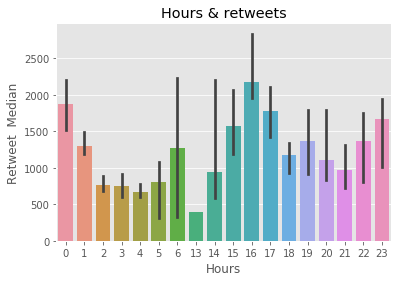

In [91]:
# Generating a copy of the dataframe
df_hr = df.copy()

# Generating a new fields "Hours"
df_hr['hour'] = df_hr['timestamp'].apply(lambda x: x.hour)

# Generating a graphical plot for the data
g=sns.barplot( x="hour", y="retweet_count", data=df_hr,estimator=median)
g.set_xlabel('Hours')

# Setting the appropriate headers
plt.title('Hours & retweets')
plt.ylabel('Retweet  Median')

# Exporting the figure
fig =g.get_figure()
fig.savefig('/home/workspace/hours_and_retweets.png')


From mere observation we can notice that the count of Retweets is high at
some particular timings like 4 PM(16 hours) or 5 PM(17 hours).


Alternatively, the Retweets show a deep dive in numbers at hours like 3 AM, 4
AM, 1 PM.

##### Visualizing Days Vs Retweets

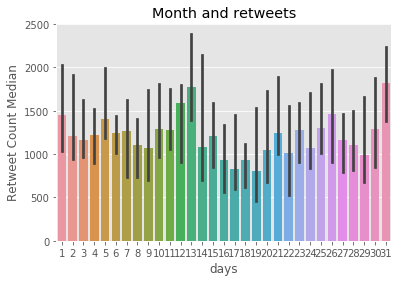

In [92]:
# Generating a copy of the dataframe
df_day = df.copy()

# Generating a new fields "day"
df_day['day'] = df_day['timestamp'].apply(lambda x: x.day)

# Generating a graphical plot for the data
g=sns.barplot( x="day", y="retweet_count", data=df_day,estimator=median)
g.set_xlabel('days')

# Setting the appropriate headers
plt.title('Month and retweets')
plt.ylabel('Retweet Count Median')

# Exporting the figure
fig =g.get_figure()
fig.savefig('/home/workspace/month_and_retweets.png')

##### Visualizing Weekdays Vs Retweets

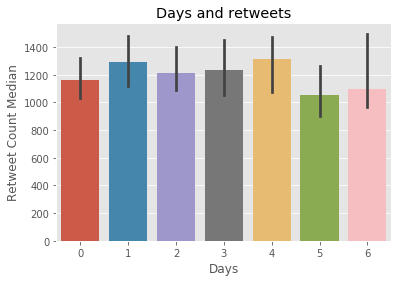

In [93]:
# Generating a copy of the dataframe
df_weekday = df.copy()

# Generating a new field "weekday"
df_weekday['weekday'] = df_weekday['timestamp'].apply(lambda x: x.weekday())

# Generating a graphical plot for the data
g=sns.barplot( x="weekday", y="retweet_count", data=df_weekday,estimator=median)
g.set_xlabel('Days')

# Setting the appropriate headers
plt.title('Days and retweets')
plt.ylabel('Retweet Count Median')

# Exporting the figure
fig =g.get_figure()
fig.savefig('/home/workspace/days_and_retweet.png')

Please Note that Monday is represented by 0, Tuesday is represented by 1, ……,
and Sunday is represented by 6.
We can notice that Tuesday and Friday, show a better performance with respect to
the Retweets, as compared to Saturday and Sunday.

##### Visualizing Dog Breeds Vs Retweets

In [94]:
# Generating a copy of the dataframe
df_breeds = df.copy()

# Fetching the count of unique breeds
print('Unique Breeds of Dogs are : ', df_breeds['p1'].nunique())

# Calculating the frequency of various breeds
df['p1'].value_counts()
frequency = df['p1'].value_counts().to_dict()
f= pd.DataFrame(list(frequency.items()), columns=['breed', 'frequency'])

# Filtering the Data for frequencies > 23 only
f.drop(f[f.frequency < 23].index, inplace=True)

Unique Breeds of Dogs are :  353


In [95]:
# Generating a new field "total_retweet"
total_retweet =[]
for i in f['breed']:
    t_r = df[df['p1'] == i]['retweet_count'].sum()
    total_retweet.append(t_r)

f['total_retweet']=total_retweet
f.head()

,breed,frequency,total_retweet
0,golden_retriever,119,270696
1,labrador_retriever,86,185610
2,pembroke,79,185093
3,chihuahua,72,111665
4,pug,52,77967


In [96]:
# Generating a new field "retweet_mean"
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head()

,breed,frequency,total_retweet,retweet_mean
0,golden_retriever,119,270696,2274
1,labrador_retriever,86,185610,2158
2,pembroke,79,185093,2342
3,chihuahua,72,111665,1550
4,pug,52,77967,1499


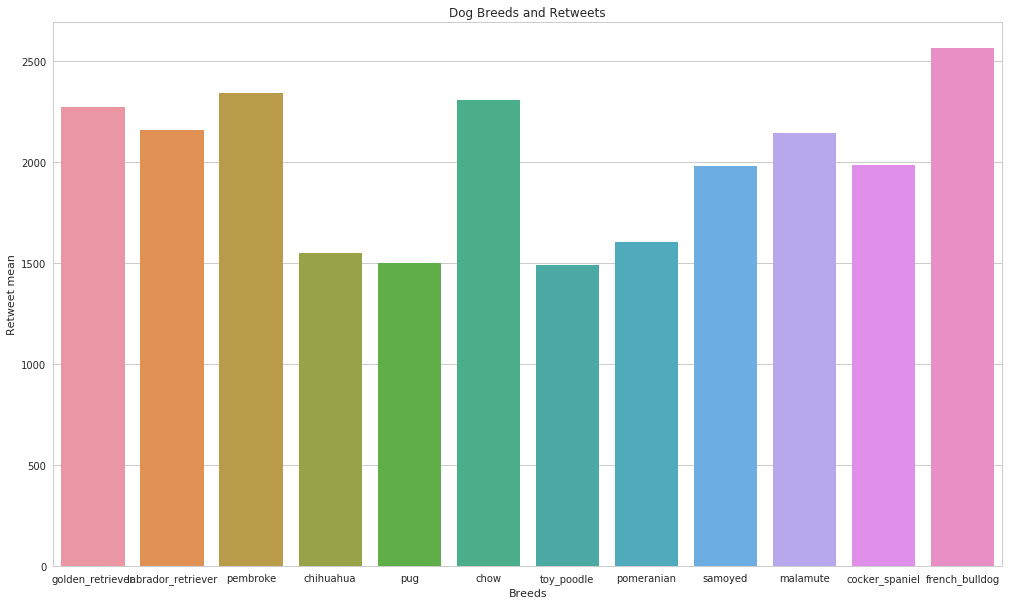

In [97]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(17,10)})

# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="breed", y="retweet_mean", data=f)
g.set_ylabel('Retweet mean')

# Setting the appropriate headers
plt.title('Dog Breeds and Retweets')
plt.xlabel('Breeds')

# Exporting the figure
fig =g.get_figure()
fig.savefig('/home/workspace/breeds_and_retweets.png')

 The above plot depicts the Breeds with the most frequent Retweets (Those
having over 23 Retweets over the time frame mentioned in Data Frame.) We notice that there are huge differences among different Breeds.
French Bulldogs have more than 2500 average retweets while pug toy poddles
have less than 1500 average retweet

##### Visualizing Stages Vs Retweets

In [98]:
# Generating a copy of the dataframe
df_stage=df.copy()

# Fetching the count of unique stages
print('Count of the Unique Dog breeds is : ', df_stage['stage'].nunique())



Count of the Unique Dog breeds is :  5


In [99]:
# Calculating the frequency of various Dog breeds
df['stage'].value_counts()
fr = df['stage'].value_counts().to_dict()
f= pd.DataFrame(list(fr.items()), columns=['stage', 'frequency'])
print(f)

              stage  frequency
0            pupper        190
1             doggo         55
2             puppo         17
3           floofer          7
4  doggo and pupper          3


In [100]:
# Generating a new field "total_retweet"
tot_retwt =[]
for i in f['stage']:
    t_r = df[df['stage'] == i]['retweet_count'].sum()
    tot_retwt.append(t_r)

f['total_retweet']=tot_retwt
f.head()

,stage,frequency,total_retweet
0,pupper,190,311562
1,doggo,55,168053
2,puppo,17,45286
3,floofer,7,19300
4,doggo and pupper,3,8031


In [101]:
# Calculating the retweet mean
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head()

,stage,frequency,total_retweet,retweet_mean
0,pupper,190,311562,1639
1,doggo,55,168053,3055
2,puppo,17,45286,2663
3,floofer,7,19300,2757
4,doggo and pupper,3,8031,2677


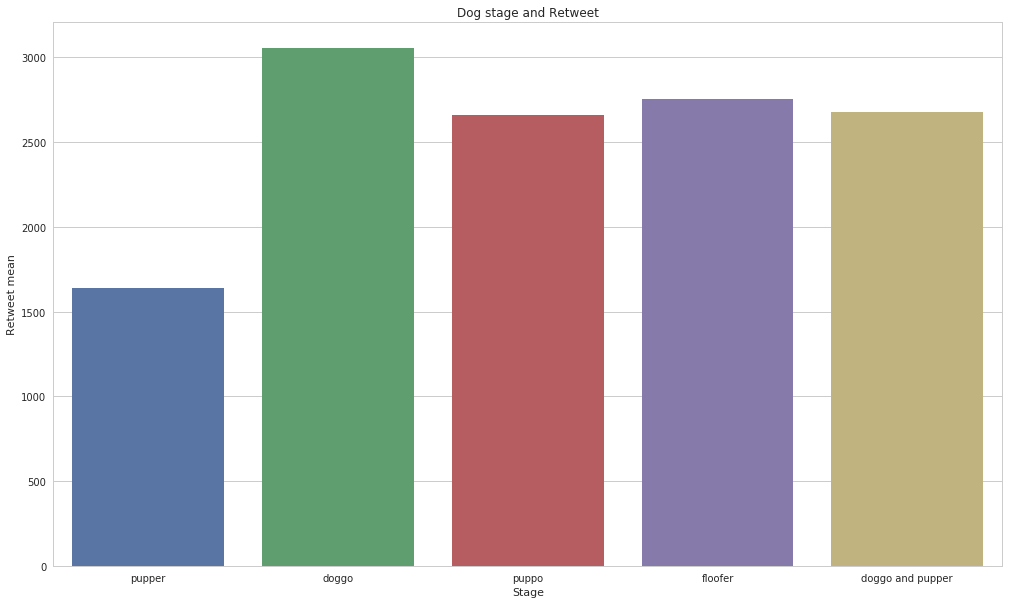

In [102]:
# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="stage", y="retweet_mean", data=f)
g.set_ylabel('Retweet mean')

# Setting the appropriate headers
plt.title('Dog stage and Retweet')
plt.xlabel('Stage')

# Exporting the figure
fig =g.get_figure()
fig.savefig('/home/workspace/stages_and_retweets.png')

It is pretty evident that the dog stages do not possess similar retweets averages,
doggo count has an average superior to 3000 and pupper is only around 1500.

##### Visualizing Rating Vs Retweets

In [103]:
# Generating a copy of the dataframe
df_rating = df.copy()

In [104]:
# Calculating the rating proportion
df_rating['rating']=df_rating['rating_numerator']/df_rating['rating_denominator']

In [105]:
# Generating a df with rating and frequency
df_rating['rating'].value_counts()
frequency = df_rating['rating'].value_counts().to_dict()
f = pd.DataFrame(list(frequency.items()), columns=['rating', 'frequency'])
f.head()

,rating,frequency
0,1.2,415
1,1.0,409
2,1.1,381
3,1.3,184
4,0.9,151


In [106]:
# Calculating the totals for Retweet
total_retweet =[]
for i in f['rating']:
    t_r = df_rating[df_rating['rating'] == i]['retweet_count'].sum()
    total_retweet.append(t_r)

f['total_retweet']=total_retweet
f.head()

# Calculating the mean for Retweets
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head()

,rating,frequency,total_retweet,retweet_mean
0,1.2,415,986770,2377
1,1.0,409,472879,1156
2,1.1,381,668064,1753
3,1.3,184,632188,3435
4,0.9,151,118582,785


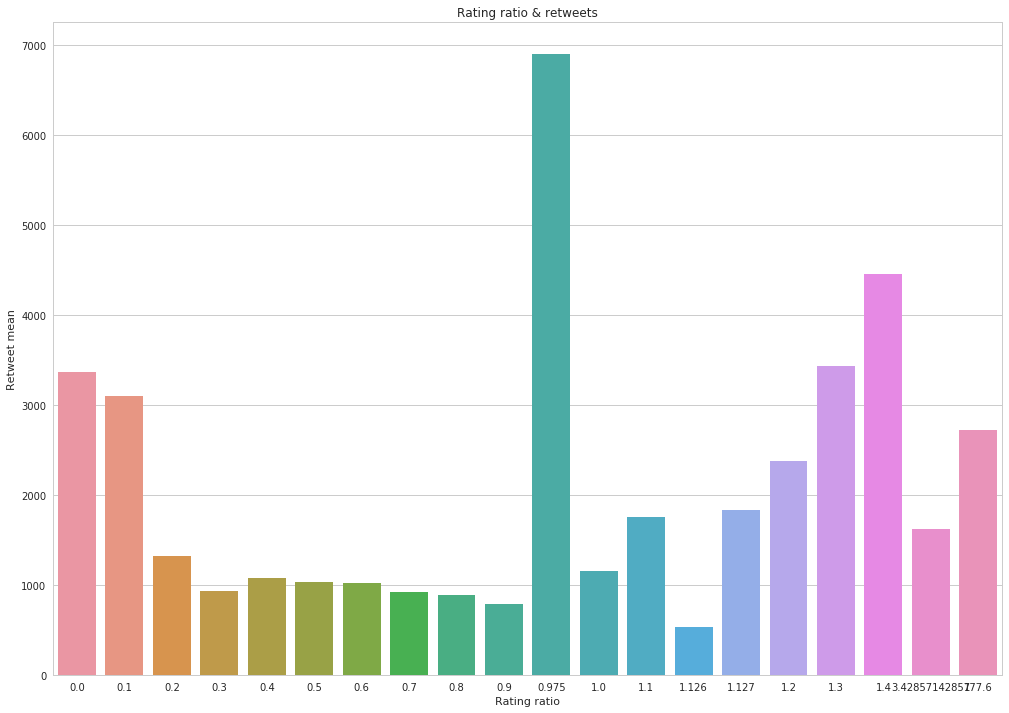

In [107]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(17,12)})

# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="rating", y="retweet_mean", data=f)
g.set_ylabel('Retweet mean')

# Setting the appropriate headers
plt.title('Rating ratio & retweets')
plt.xlabel('Rating ratio')

# Exporting the figure
fig =g.get_figure()
fig.savefig('/home/workspace/rating_and_retweets.png')